Dataset :- https://www.kaggle.com/datasets/camnugent/california-housing-prices

# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load Dataset

In [ ]:
df = pd.read_csv("California_Housing.csv")

# STEP 3: Basic EDA

In [ ]:
print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")

Shape: (20640, 10) (Rows: 20640, Columns: 10)


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Check Missing Values

missing = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
  "Missing Count": missing,
  "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

                Missing Count  Missing Percentage
total_bedrooms            207            1.002907


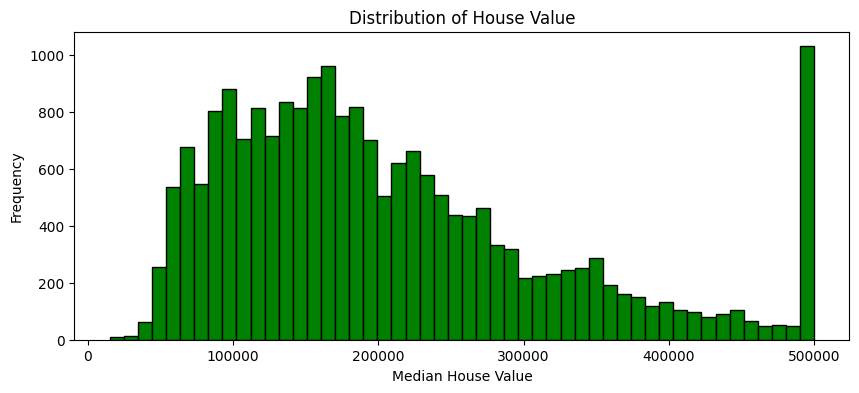

In [ ]:
# Visualize target variable
plt.figure(figsize=(10,4))
plt.hist(df['median_house_value'], bins=50, color='green', edgecolor='black')
plt.title("Distribution of House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# select numerical columns
numerical_columns = df.select_dtypes(include=('float64', 'int64'))

numerical_columns.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
# Correlation analysis for numeric features

corr = numerical_columns.corr()['median_house_value'].sort_values(ascending=False)
print(corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


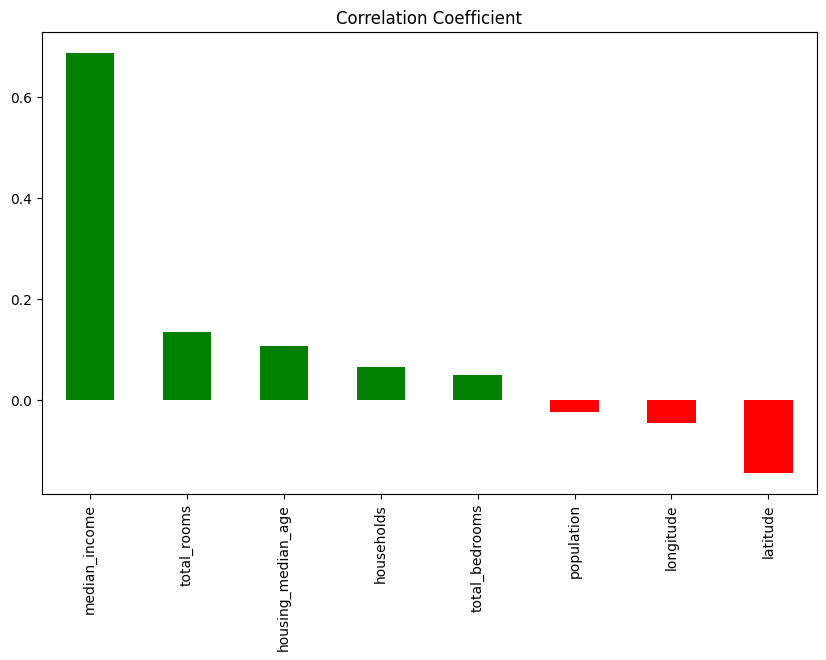

In [ ]:
plt.figure(figsize=(10,6))
corr.drop('median_house_value').plot(kind='bar', color=['green' if x > 0 else 'red' for x in corr.drop('median_house_value')])
plt.title('Correlation with Median House Value')
plt.title('Correlation Coefficient')
plt.show()

# STEP 4: Handle Missing Values

In [ ]:
# Check Missing Values

missing = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
  "Missing Count": missing,
  "Missing Percentage": missing_percentage
})

print(F"Missing Value Before: ")
print(missing_df[missing_df["Missing Count"] > 0])

Missing Value Before: 
                Missing Count  Missing Percentage
total_bedrooms            207            1.002907


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Check Missing Values

missing = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
  "Missing Count": missing,
  "Missing Percentage": missing_percentage
})

print(F"Missing Value After: ")
print(missing_df[missing_df["Missing Count"] > 0])

Missing Value After: 
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


# STEP 5: Feature Selection/Preprocessing

In [ ]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1, errors='ignore') # Drop target + categorical columns if present
y = df['median_house_value']

In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

# STEP 6: Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
y_train.shape

(16512,)

In [ ]:
X_test.shape

(4128, 8)

In [ ]:
y_test.shape

(4128,)

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [ ]:
y_train.head()

,median_house_value
14196,103000.0
8267,382100.0
17445,172600.0
14265,93400.0
2271,96500.0


# STEP 7: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
print(X_train_scaler[3])

[ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
 -0.38058662 -1.01786438]


In [ ]:
print(X_test_scaler[3])

[ 0.42994293 -0.63799909 -0.92113763  0.18808002 -0.24701249  0.24497944
 -0.01309052  0.97511311]


# STEP 8: Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_scaler, y_train)

LinearRegression()

In [ ]:
model.score(X_test_scaler, y_test)

0.6138664756435176

# STEP 9: Prediction/Evaluation

In [ ]:
y_pred = model.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Linear Regression")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Linear Regression
Mean Squared Error: 5059928371.1654
Mean Absolute Error: 51810.4836
R2 Score: 0.6139


# STEP 10: Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(model, X_train_scaler, y_train, cv=5, scoring='r2')
print(f"Cross Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2: {cv_scores.max():.4f}")

Cross Validation R2 Scores: [0.64649507 0.64090875 0.65068355 0.63719795 0.61537288]
Mean CV R2: 0.6507


# STEP 11: RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train_scaler, y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Ridge Regression
Mean Squared Error: 5059421079.5014
Mean Absolute Error: 51808.5274
R2 Score: 0.6139


# STEP 12: LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train_scaler, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Lasso Regression
Mean Squared Error: 5059842582.2914
Mean Absolute Error: 51810.2728
R2 Score: 0.6139


# STEP 13: ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaler, y_train)

ElasticNet()

In [ ]:
y_pred_elasticnet = elasticnet.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred_elasticnet)
mae = mean_absolute_error(y_test, y_pred_elasticnet)
r2 = r2_score(y_test, y_pred)

print("ElasticNet Regression")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absoluet Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

ElasticNet Regression
Mean Squared Error: 6750147160.0761
Mean Absoluet Error: 62927.0523
R2 Score: 0.6139


# Model Comparison

In [ ]:
results = pd.DataFrame({
    "Models": ['Linear Regression', 'Ridge', 'Lasso', "ElasticNet"],
    "R2 Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elasticnet)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
    ]
})

print(results)

              Models  R2 Score          RMSE
0  Linear Regression  0.613866  71133.173493
1              Ridge  0.613905  71129.607615
2              Lasso  0.613873  71132.570474
3         ElasticNet  0.484882  82159.279209


# HYPERPARAMETER TUNING FOR RIDGE, LASSO, AND ELASTICNET


HYPERPARAMETER TUNING WITH GRIDSEARCHCV

[1] Tuning Ridge Regression...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

✓ Best Alpha for Ridge: 10
✓ Best CV R² Score: 0.6382
✓ Test R² Score: 0.6142
✓ Test RMSE: 71099.64

[2] Tuning Lasso Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

✓ Best Alpha for Lasso: 10
✓ Best CV R² Score: 0.6381
✓ Test R² Score: 0.6139
✓ Test RMSE: 71127.21
✓ Features Selected: 8/8

[3] Tuning ElasticNet Regression...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

✓ Best Alpha for ElasticNet: 0.01
✓ Best L1 Ratio: 0.9
✓ Best CV R² Score: 0.6382
✓ Test R² Score: 0.6144
✓ Test RMSE: 71080.20

COMPARISON: BEFORE vs AFTER TUNING


                  Model  R² Score          RMSE
0       Ridge (Default)  0.613905  71129.607615
1         Ridge (Tuned)  0.614230  71099.644954
2       Lasso (Default)  0.613873  71132.570474
3         Lasso (Tuned)  0.613931  71127.208506
4  ElasticNet (Default)  0.484882  82159.2

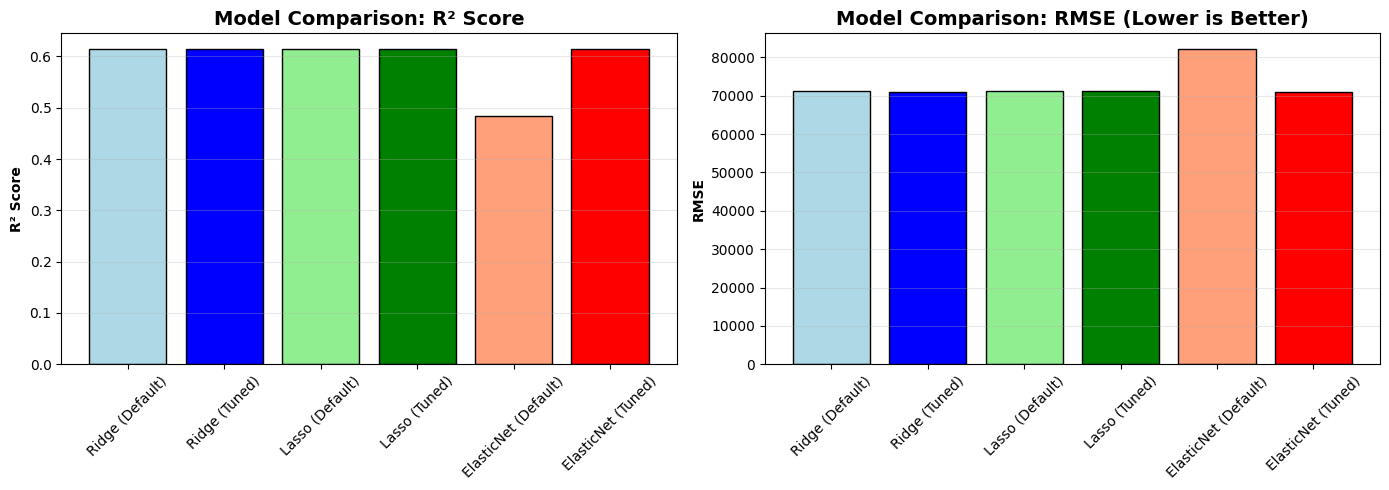


✓ Hyperparameter tuning complete!


In [ ]:
# ============================================================================
# HYPERPARAMETER TUNING FOR RIDGE, LASSO, AND ELASTICNET
# ============================================================================

from sklearn.model_selection import GridSearchCV

print("\n" + "="*70)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*70)

# ============================================================================
# 1. RIDGE REGRESSION TUNING
# ============================================================================
print("\n[1] Tuning Ridge Regression...")

# Define parameter grid for Ridge
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Create GridSearchCV object
ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    cv=5,                      # 5-fold cross-validation
    scoring='r2',              # Optimize for R² score
    verbose=1,                 # Show progress
    n_jobs=-1                  # Use all CPU cores
)

# Fit GridSearchCV
ridge_grid.fit(X_train_scaler, y_train)

# Best parameters and score
print(f"\n✓ Best Alpha for Ridge: {ridge_grid.best_params_['alpha']}")
print(f"✓ Best CV R² Score: {ridge_grid.best_score_:.4f}")

# Predict with best model
y_pred_ridge_tuned = ridge_grid.best_estimator_.predict(X_test_scaler)
ridge_tuned_r2 = r2_score(y_test, y_pred_ridge_tuned)
ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_tuned))

print(f"✓ Test R² Score: {ridge_tuned_r2:.4f}")
print(f"✓ Test RMSE: {ridge_tuned_rmse:.2f}")

# ============================================================================
# 2. LASSO REGRESSION TUNING
# ============================================================================
print("\n[2] Tuning Lasso Regression...")

# Define parameter grid for Lasso
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV object
lasso_grid = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid=lasso_params,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
lasso_grid.fit(X_train_scaler, y_train)

# Best parameters and score
print(f"\n✓ Best Alpha for Lasso: {lasso_grid.best_params_['alpha']}")
print(f"✓ Best CV R² Score: {lasso_grid.best_score_:.4f}")

# Predict with best model
y_pred_lasso_tuned = lasso_grid.best_estimator_.predict(X_test_scaler)
lasso_tuned_r2 = r2_score(y_test, y_pred_lasso_tuned)
lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso_tuned))

print(f"✓ Test R² Score: {lasso_tuned_r2:.4f}")
print(f"✓ Test RMSE: {lasso_tuned_rmse:.2f}")

# Check feature selection (how many features Lasso keeps)
n_features_selected = np.sum(lasso_grid.best_estimator_.coef_ != 0)
print(f"✓ Features Selected: {n_features_selected}/{X.shape[1]}")

# ============================================================================
# 3. ELASTICNET REGRESSION TUNING
# ============================================================================
print("\n[3] Tuning ElasticNet Regression...")

# Define parameter grid for ElasticNet
elasticnet_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]  # Mix of L1 and L2
}

# Create GridSearchCV object
elasticnet_grid = GridSearchCV(
    estimator=ElasticNet(max_iter=10000),
    param_grid=elasticnet_params,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
elasticnet_grid.fit(X_train_scaler, y_train)

# Best parameters and score
print(f"\n✓ Best Alpha for ElasticNet: {elasticnet_grid.best_params_['alpha']}")
print(f"✓ Best L1 Ratio: {elasticnet_grid.best_params_['l1_ratio']}")
print(f"✓ Best CV R² Score: {elasticnet_grid.best_score_:.4f}")

# Predict with best model
y_pred_elastic_tuned = elasticnet_grid.best_estimator_.predict(X_test_scaler)
elastic_tuned_r2 = r2_score(y_test, y_pred_elastic_tuned)
elastic_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic_tuned))

print(f"✓ Test R² Score: {elastic_tuned_r2:.4f}")
print(f"✓ Test RMSE: {elastic_tuned_rmse:.2f}")

# ============================================================================
# 4. COMPARE TUNED MODELS
# ============================================================================
print("\n" + "="*70)
print("COMPARISON: BEFORE vs AFTER TUNING")
print("="*70)

tuned_results = pd.DataFrame({
    "Model": ['Ridge (Default)', 'Ridge (Tuned)',
              'Lasso (Default)', 'Lasso (Tuned)',
              'ElasticNet (Default)', 'ElasticNet (Tuned)'],
    "R² Score": [
        r2_score(y_test, y_pred_ridge),
        ridge_tuned_r2,
        r2_score(y_test, y_pred_lasso),
        lasso_tuned_r2,
        r2_score(y_test, y_pred_elasticnet),
        elastic_tuned_r2
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        ridge_tuned_rmse,
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        lasso_tuned_rmse,
        np.sqrt(mean_squared_error(y_test, y_pred_elasticnet)),
        elastic_tuned_rmse
    ]
})

print("\n")
print(tuned_results)

# Find best overall model
best_idx = tuned_results['R² Score'].idxmax()
best_model_name = tuned_results.loc[best_idx, 'Model']
best_r2 = tuned_results.loc[best_idx, 'R² Score']
best_rmse = tuned_results.loc[best_idx, 'RMSE']

print(f"\n{'='*70}")
print(f"✓ BEST MODEL: {best_model_name}")
print(f"  - R² Score: {best_r2:.4f} (explains {best_r2*100:.1f}% variance)")
print(f"  - RMSE: ${best_rmse:.2f}")
print(f"{'='*70}")

# ============================================================================
# 5. VISUALIZE TUNING RESULTS
# ============================================================================
print("\n[Generating Comparison Visualization...]")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score Comparison
axes[0].bar(tuned_results['Model'], tuned_results['R² Score'],
            color=['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red'],
            edgecolor='black')
axes[0].set_ylabel('R² Score', fontweight='bold')
axes[0].set_title('Model Comparison: R² Score', fontweight='bold', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# RMSE Comparison
axes[1].bar(tuned_results['Model'], tuned_results['RMSE'],
            color=['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red'],
            edgecolor='black')
axes[1].set_ylabel('RMSE', fontweight='bold')
axes[1].set_title('Model Comparison: RMSE (Lower is Better)', fontweight='bold', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Hyperparameter tuning complete!")
